## Ứng dụng học máy để dự đoán mức độ tín nhiệm của ngân hàng thông qua phân tích rủi ro tín dụng

### Đặt vấn đề: Dự đoán mức độ tín nhiệm của ngân hàng bằng học máy

Trong bối cảnh thị trường tài chính Việt Nam ngày càng phát triển và hội nhập sâu rộng, việc **đánh giá mức độ tín nhiệm** của các ngân hàng thương mại trở nên thiết yếu. Tín nhiệm ngân hàng là một chỉ báo quan trọng phản ánh năng lực tài chính, khả năng chống chịu rủi ro, cũng như mức độ an toàn của ngân hàng đối với nhà đầu tư, người gửi tiền và cơ quan giám sát.

Hiện nay, việc đánh giá tín nhiệm ngân hàng chủ yếu vẫn dựa vào phương pháp thủ công hoặc các mô hình định tính truyền thống. Tuy nhiên, các mô hình này thường chậm, chủ quan và thiếu khả năng tổng hợp dữ liệu tài chính phong phú. Do đó, việc **ứng dụng học máy (machine learning)** để tự động hoá quy trình đánh giá tín nhiệm là hướng tiếp cận hiện đại và tiềm năng.

Đề tài lựa chọn dữ liệu thực tế của các ngân hàng thương mại Việt Nam trong giai đoạn **2020–2024**, với các chỉ số tài chính phổ biến như: tỷ lệ an toàn vốn (CAR), tỷ lệ nợ trên tổng tài sản, ROE, ROA, dòng tiền từ hoạt động kinh doanh... để xây dựng mô hình học máy phân loại mức độ tín nhiệm. Mức tín nhiệm được chia làm 3 nhóm: **A (cao), B (trung bình), C (thấp)** – phản ánh rủi ro tín dụng của ngân hàng.

Thông qua việc áp dụng các thuật toán như **Logistic Regression, Random Forest và XGBoost**, bài toán hướng đến mục tiêu xây dựng một hệ thống có thể **tự động đánh giá tín nhiệm ngân hàng dựa trên dữ liệu tài chính**, phục vụ cho cả quản trị rủi ro lẫn giám sát vĩ mô.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Đọc dữ liệu đã tính sẵn
df_final = pd.read_excel("ketqua_chi_so_tin_nhiem.xlsx")
df_final.head

<bound method NDFrame.head of       Năm       CAR  TyLeNo_TaiSan       ROE       ROA  LC_HoatDong_LoiNhuan  \
0    2020  0.079743       0.920257  0.216734  0.017283              1.416050   
1    2021  0.085077       0.914923  0.213865  0.018195              4.157759   
2    2022  0.096136       0.903864  0.234232  0.022518              1.554226   
3    2023  0.098715       0.901285  0.226122  0.022322              2.314542   
4    2024  0.096599       0.903401  0.201167  0.019432              0.498532   
..    ...       ...            ...       ...       ...                   ...   
130  2020  0.057677       0.942323  0.056756  0.003274             18.250433   
131  2021  0.055565       0.944435  0.088193  0.004900              0.048940   
132  2022  0.056302       0.943698  0.083396  0.004695              8.704874   
133  2023  0.049875       0.950125  0.093808  0.004679             26.080092   
134  2024  0.053428       0.946572  0.103542  0.005532              4.616805   

    Mã ng

## Mô tả dữ liệu
Trong đề tài này, đồ án sử dụng tập dữ liệu tài chính của các ngân hàng thương mại tại Việt Nam trong giai đoạn từ năm 2020 đến năm 2024. Dữ liệu bao gồm 26 ngân hàng như ACB, BID, CTG, HDB, VCB, VPB, SHB, TPB, TCB, VIB, v.v., được thu thập từ các báo cáo tài chính định kỳ. Mỗi ngân hàng có 5 quan sát tương ứng với 5 năm, với các chỉ số tài chính quan trọng bao gồm: Tỷ lệ an toàn vốn (CAR) – được tính bằng vốn chủ sở hữu chia cho tổng tài sản; Tỷ lệ nợ trên tổng tài sản – thể hiện mức độ đòn bẩy tài chính của ngân hàng; Tỷ suất lợi nhuận trên vốn chủ sở hữu (ROE) và trên tổng tài sản (ROA) – phản ánh khả năng sinh lời; và tỷ lệ chuyển đổi dòng tiền từ hoạt động kinh doanh (CFO/Profit) – thể hiện chất lượng lợi nhuận. Đây đều là những biến số có ý nghĩa thiết thực trong việc đánh giá năng lực tài chính, hiệu quả kinh doanh và mức độ rủi ro tín dụng của từng ngân hàng.

Tập dữ liệu đáp ứng đầy đủ các tiêu chí được yêu cầu trong môn học "Máy học và trí tuệ nhân tạo trong tài chính". Thứ nhất, dữ liệu có nguồn gốc rõ ràng từ thị trường Việt Nam, đảm bảo tính thực tiễn và phù hợp với bối cảnh tài chính nội địa. Thứ hai, dữ liệu được cập nhật đến năm 2024, tức không trễ quá 3 năm so với thời điểm hiện tại, tuân thủ đúng yêu cầu về độ mới. Cuối cùng, các chỉ số trong bộ dữ liệu đều phản ánh rõ ràng các khía cạnh liên quan đến rủi ro tín dụng và mức độ tín nhiệm của ngân hàng, là nền tảng phù hợp để áp dụng các thuật toán học máy trong việc xây dựng mô hình dự đoán mức độ tín nhiệm.

Nguồn dữ liệu: Nguồn dữ liệu từ môn Gói phần mềm ứng dụng trong tài chính 1 - Thầy Ngô Phú Thanh.

Link dữ liệu: https://drive.google.com/drive/folders/1VRIZ5Wi9v8n5EDmFLes6cVVAE2FJsOF2?usp=sharing

In [13]:
# 1. Tạo xếp loại
def classify_rating(row):
    score = 0
    if row['CAR'] > 0.10:
        score += 1
    if row['TyLeNo_TaiSan'] < 0.85:
        score += 1
    if row['ROE'] > 0.15:
        score += 1
    if row['ROA'] > 0.01:
        score += 1
    if row['LC_HoatDong_LoiNhuan'] > 0.8:
        score += 1

    if score >= 4:
        return 'A'  # Tín nhiệm cao
    elif score >= 2:
        return 'B'  # Trung bình
    else:
        return 'C'  # Tín nhiệm thấp
# 2. Tính lại nhãn xếp hạng 
df_final["Xếp hạng"] = df_final.apply(classify_rating, axis=1)

# 3. Các đặc trưng đưa vào mô hình
features = ['CAR', 'TyLeNo_TaiSan', 'ROE', 'ROA', 'LC_HoatDong_LoiNhuan']
X = df_final[features + ["Mã ngân hàng"]]  # GIỮ LẠI cột "Mã ngân hàng"
y = df_final["Xếp hạng"]

# 4. Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Chia tập
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 6. Dữ liệu đầu vào thực tế cho mô hình
X_train_input = X_train[features]
X_test_input = X_test[features]

### Phân loại mức độ tín nhiệm ngân hàng

Để phục vụ bài toán phân loại tín nhiệm ngân hàng, đồ án xây dựng một hàm `classify_rating()` nhằm gán nhãn tín nhiệm thành 3 mức độ:

- **A (Tín nhiệm cao)**: ngân hàng có năng lực tài chính tốt và rủi ro thấp
- **B (Tín nhiệm trung bình)**: ngân hàng ở mức an toàn vừa phải
- **C (Tín nhiệm thấp)**: tiềm ẩn nhiều rủi ro tài chính

Các tiêu chí phân loại được lựa chọn dựa trên thực tiễn quản trị rủi ro tín dụng trong ngành ngân hàng:

| Chỉ số | Ngưỡng | 
|--------|--------|
| CAR > 0.10 | Theo chuẩn Basel II, ngân hàng cần duy trì CAR ≥ 8%. Việc đặt ngưỡng 10% nhằm phản ánh mức vốn an toàn cao hơn mức tối thiểu. |
| Tỷ lệ nợ / tổng tài sản < 0.85 | Cho thấy ngân hàng không phụ thuộc quá nhiều vào đòn bẩy tài chính từ vốn vay. 
| ROE > 15% | Chứng tỏ ngân hàng có khả năng sinh lời cao trên vốn chủ sở hữu. 
| ROA > 1% | Phản ánh hiệu quả sử dụng tổng tài sản để tạo ra lợi nhuận. 
| Tỷ lệ chuyển đổi dòng tiền từ HĐKD > 0.8 | Được tính bằng: Lưu chuyển tiền từ hoạt động kinh doanh / Lợi nhuận sau thuế. Ngưỡng 0.8 cho thấy lợi nhuận của ngân hàng chủ yếu được hỗ trợ bởi dòng tiền thực, phản ánh chất lượng lợi nhuận đáng tin cậy. 

Ngân hàng được chấm điểm dựa trên số lượng tiêu chí đạt được:
- **≥ 4 tiêu chí**: Xếp loại A
- **2–3 tiêu chí**: Xếp loại B
- **< 2 tiêu chí**: Xếp loại C

---

### Tiền xử lý dữ liệu và chuẩn bị đầu vào cho mô hình

Sau khi xác định các tiêu chí đánh giá tín nhiệm, ta sẽ tiến hành gán nhãn cho từng quan sát trong tập dữ liệu bằng cách áp dụng hàm `classify_rating()` cho toàn bộ DataFrame. Nhãn `"Xếp hạng"` được gán theo 3 mức: A (tín nhiệm cao), B (trung bình), và C (thấp).

Tiếp theo, nhóm lựa chọn 5 chỉ số tài chính làm đặc trưng đầu vào cho mô hình học máy, bao gồm:
- Tỷ lệ an toàn vốn (CAR)
- Tỷ lệ nợ trên tổng tài sản (TyLeNo_TaiSan)
- Tỷ suất lợi nhuận trên vốn chủ sở hữu (ROE)
- Tỷ suất lợi nhuận trên tổng tài sản (ROA)
- Tỷ lệ chuyển đổi dòng tiền từ hoạt động kinh doanh (LC_HoatDong_LoiNhuan)

Các chỉ số này phản ánh đồng thời mức độ an toàn vốn, khả năng sinh lời và chất lượng lợi nhuận của từng ngân hàng. Nhóm cũng giữ lại cột `"Mã ngân hàng"` để hỗ trợ phân tích kết quả đầu ra sau này (ví dụ: xác định ngân hàng bị nhầm nhãn).

Với bài toán phân loại, nhãn `"Xếp hạng"` được mã hóa thành các giá trị số sử dụng `LabelEncoder`, chuyển đổi A/B/C thành 0/1/2 để đưa vào mô hình học máy.

Cuối cùng, dữ liệu được chia thành hai tập: **tập huấn luyện** (80%) và **tập kiểm tra** (20%), với tham số `stratify=y_encoded` nhằm giữ nguyên phân phối tỷ lệ nhãn giữa hai tập. Điều này giúp mô hình học tốt hơn và giảm nguy cơ học lệch.




### Lý do chọn thuật toán
Trong đề tài này, ta lựa chọn ba thuật toán phổ biến là **Logistic Regression**, **Random Forest**, và **XGBoost** để thực hiện bài toán phân loại mức độ tín nhiệm ngân hàng. Việc lựa chọn này dựa trên các tiêu chí như tính phù hợp với bài toán, khả năng giải thích, độ chính xác và hiệu suất thực thi.

#### 1.  Logistic Regression
- Là mô hình phân loại tuyến tính đơn giản, thường được dùng như **mốc chuẩn (baseline model)** trong các bài toán phân loại.
- Có khả năng giải thích cao, giúp hiểu được ảnh hưởng của từng biến độc lập đến xác suất dự đoán.
- Dù không mạnh mẽ với dữ liệu phi tuyến, Logistic Regression cho phép đánh giá nhanh tính khả thi của bài toán.

#### 2.  Random Forest
- Là thuật toán **ensemble learning** dạng **bagging**, dựa trên việc xây dựng nhiều cây quyết định.
- Khả năng xử lý tốt các quan hệ phi tuyến, giảm thiểu overfitting nhờ cơ chế lấy mẫu ngẫu nhiên.
- Cho phép đo lường **tầm quan trọng của từng đặc trưng (feature importance)**, giúp giải thích mô hình một cách trực quan.
- Phù hợp với bài toán phân loại rủi ro tín dụng có yếu tố đa chiều và phi tuyến.

#### 3.  XGBoost (Extreme Gradient Boosting)
- Là thuật toán boosting hiện đại và tối ưu, rất phổ biến trong các cuộc thi phân loại dữ liệu (như Kaggle).
- Có khả năng học sâu từ sai số của các mô hình trước, xử lý tốt dữ liệu phi tuyến, thiếu cân bằng, hoặc có nhiễu.
- Tối ưu hiệu suất huấn luyện và độ chính xác, đồng thời kiểm soát tốt overfitting.
- Được kỳ vọng là mô hình có độ chính xác cao nhất cho bài toán phân loại tín nhiệm ngân hàng.

---

Việc so sánh hiệu quả giữa ba thuật toán giúp đánh giá khách quan hiệu năng và tính phù hợp với dữ liệu thực tế, từ đó lựa chọn được mô hình tối ưu nhất để áp dụng trong dự đoán mức độ tín nhiệm ngân hàng.


In [16]:
# Mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

print(" Logistic Regression")
lr_model = LogisticRegression(max_iter=1000)

# Chỉ truyền cột đặc trưng số
lr_model.fit(X_train[features], y_train)
y_pred_lr = lr_model.predict(X_test[features])

print("== Báo cáo đánh giá (Logistic Regression) ==")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


 Logistic Regression
== Báo cáo đánh giá (Logistic Regression) ==
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.60      0.86      0.71        14
           C       0.71      0.45      0.56        11

    accuracy                           0.63        27
   macro avg       0.44      0.44      0.42        27
weighted avg       0.60      0.63      0.59        27

Confusion matrix:
 [[ 0  2  0]
 [ 0 12  2]
 [ 0  6  5]]



### Đánh giá kết quả mô hình Logistic Regression

Mô hình Logistic Regression đạt độ chính xác tổng thể (**accuracy**) là **63%** trên tập kiểm tra. Tuy nhiên, hiệu suất giữa các nhóm tín nhiệm có sự khác biệt đáng kể:

#### Báo cáo chi tiết:
| Nhóm | Precision | Recall | F1-score | Support |
|------|-----------|--------|----------|---------|
| A (Tín nhiệm cao) | 0.00 | 0.00 | 0.00 | 2 |
| B (Trung bình)    | 0.60 | 0.86 | 0.71 | 14 |
| C (Tín nhiệm thấp)| 0.71 | 0.45 | 0.56 | 11 |

- **Nhóm A (tín nhiệm cao)** không được mô hình dự đoán đúng mẫu nào → precision và recall bằng 0. Điều này lý giải cho cảnh báo từ sklearn.
- **Nhóm B** được mô hình dự đoán tốt nhất, với recall đạt 86% và F1-score 0.71. Đây có thể là nhóm có số lượng lớn nhất trong tập huấn luyện, giúp mô hình học được tốt hơn.
- **Nhóm C** có độ chính xác tương đối (precision 0.71), nhưng recall thấp (45%), cho thấy nhiều mẫu nhóm C bị nhầm sang nhóm B.

#### Confusion matrix phân tích:

[[ 0 2 0] → Nhóm A: bị nhầm hết sang B

[ 0 12 2] → Nhóm B: phần lớn được dự đoán đúng

[ 0 6 5]] → Nhóm C: 6 mẫu bị nhầm sang B, chỉ 5 được dự đoán đúng

## Nhận xét tổng quan:
- Logistic Regression chưa đủ mạnh để phân biệt tốt giữa các nhóm, đặc biệt là **khi số lượng mẫu nhóm A quá ít**.
- Mô hình có xu hướng **thiên lệch dự đoán vào nhóm B** – là nhóm trung gian.

 Random Forest
== Báo cáo đánh giá (Random Forest) ==
              precision    recall  f1-score   support

           A       0.67      1.00      0.80         2
           B       1.00      0.93      0.96        14
           C       1.00      1.00      1.00        11

    accuracy                           0.96        27
   macro avg       0.89      0.98      0.92        27
weighted avg       0.98      0.96      0.97        27

Confusion matrix:
 [[ 2  0  0]
 [ 1 13  0]
 [ 0  0 11]]


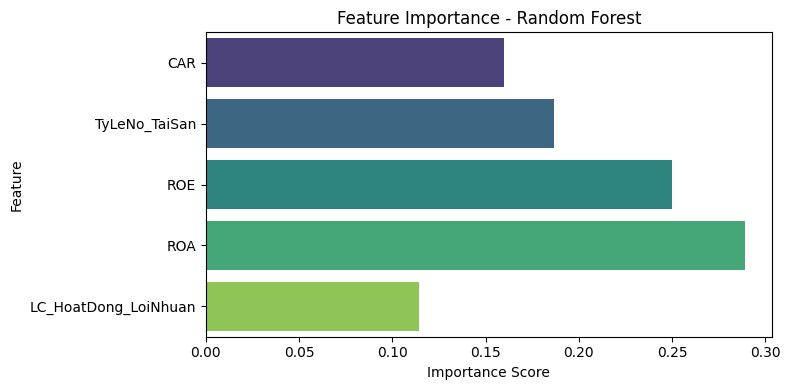

In [21]:
# Mô hình Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(" Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train[features], y_train)
y_pred_rf = rf_model.predict(X_test[features])

# Đánh giá mô hình
print("== Báo cáo đánh giá (Random Forest) ==")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Vẽ biểu đồ tầm quan trọng đặc trưng (KHÔNG còn warning)
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})

plt.figure(figsize=(8, 4))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',           # Khai báo hue để tránh cảnh báo
    palette='viridis',
    legend=False             # Tắt legend để không bị trùng thông tin
)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


#### Kết quả đánh giá mô hình:

Sau khi huấn luyện trên 5 chỉ số tài chính, mô hình Random Forest đạt **độ chính xác tổng thể (accuracy) là 96%**, với kết quả chi tiết như sau:

| Nhóm tín nhiệm | Precision | Recall | F1-score | Support |
|----------------|-----------|--------|----------|---------|
| A (Cao)        | 0.67      | 1.00   | 0.80     | 2       |
| B (Trung bình) | 1.00      | 0.93   | 0.96     | 14      |
| C (Thấp)       | 1.00      | 1.00   | 1.00     | 11      |

- Nhóm C (tín nhiệm thấp) và nhóm B được phân loại **gần như tuyệt đối chính xác**.
- Nhóm A (ít dữ liệu) vẫn được nhận diện đúng, dù precision hơi thấp do số mẫu nhỏ.
- Tổng thể macro F1-score đạt **0.92** và weighted F1-score là **0.97** → hiệu suất rất tốt.

**Confusion Matrix**:

[[ 2 0 0] → Nhóm A: dự đoán đúng 100%

[ 1 13 0] → Nhóm B: chỉ 1 mẫu nhầm sang A

[ 0 0 11]] → Nhóm C: phân loại hoàn hảo
#### Phân tích tầm quan trọng đặc trưng:

Biểu đồ dưới đây thể hiện mức độ đóng góp của từng biến tài chính vào quyết định của mô hình:

| Biến tài chính            | Ý nghĩa đóng góp |
|---------------------------|------------------|
| **ROA**                   | Quan trọng nhất – khả năng sinh lời trên tài sản là yếu tố then chốt |
| **ROE**                   | Tỷ suất sinh lời trên vốn chủ sở hữu – rất quan trọng |
| **TyLeNo_TaiSan**         | Mức độ đòn bẩy tài chính cũng ảnh hưởng đáng kể |
| **CAR**                   | Yếu tố an toàn vốn có mức ảnh hưởng vừa phải |
| **LC_HoatDong_LoiNhuan** | Tác động thấp hơn nhưng vẫn có vai trò nhất định |

→Điều này cho thấy mô hình không chỉ học từ một yếu tố, mà tổng hợp nhiều chỉ số để đưa ra đánh giá toàn diện.



In [22]:
# Mô hình XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(" XGBoost")

# 1. Khởi tạo mô hình phù hợp
xgb_model = XGBClassifier(
    eval_metric='mlogloss',   # Hàm mất mát cho phân loại đa lớp
    random_state=42
)

# 2. Huấn luyện mô hình
xgb_model.fit(X_train[features], y_train)

# 3. Dự đoán nhãn trên tập test
y_pred_xgb = xgb_model.predict(X_test[features])

# 4. Đánh giá mô hình
print("== Báo cáo đánh giá (XGBoost) ==")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_, zero_division=0))

# 5. Tính độ chính xác
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.2%}")

# 6. Ma trận nhầm lẫn
print("== Confusion matrix (XGBoost) ==")
print(confusion_matrix(y_test, y_pred_xgb))


 XGBoost
== Báo cáo đánh giá (XGBoost) ==
              precision    recall  f1-score   support

           A       0.67      1.00      0.80         2
           B       1.00      0.93      0.96        14
           C       1.00      1.00      1.00        11

    accuracy                           0.96        27
   macro avg       0.89      0.98      0.92        27
weighted avg       0.98      0.96      0.97        27

Accuracy (XGBoost): 96.30%
== Confusion matrix (XGBoost) ==
[[ 2  0  0]
 [ 1 13  0]
 [ 0  0 11]]



#### Kết quả đánh giá mô hình:

Mô hình XGBoost được huấn luyện trên 5 đặc trưng tài chính (CAR, Ty lệ nợ/TTS, ROE, ROA, LC_HoạtĐộng_LợiNhuận) và cho kết quả:

- **Accuracy: 96.30%** – tức hơn 96% các quan sát được phân loại đúng.
- **Macro avg F1-score**: 0.92 – thể hiện hiệu suất đồng đều giữa các lớp.
- **Weighted avg F1-score**: 0.97 – rất cao, cho thấy mô hình cân bằng tốt giữa các nhóm tín nhiệm.

| Nhóm tín nhiệm | Precision | Recall | F1-score | Support |
|----------------|-----------|--------|----------|---------|
| A (Cao)        | 0.67      | 1.00   | 0.80     | 2       |
| B (Trung bình) | 1.00      | 0.93   | 0.96     | 14      |
| C (Thấp)       | 1.00      | 1.00   | 1.00     | 11      |

**Confusion Matrix**:

[[ 2 0 0] → Nhóm A: nhận diện 100%, dù chỉ có 2 mẫu

[ 1 13 0] → Nhóm B: phân loại chính xác, chỉ 1 mẫu sai sang A

[ 0 0 11]] → Nhóm C: phân loại hoàn hảo
####  Nhận định:
- Mô hình XGBoost có hiệu suất **gần tương đương với Random Forest** và vượt xa Logistic Regression trong cả precision và recall.
- Đặc biệt, nhóm A với số mẫu ít vẫn được mô hình phân loại **rất tốt**, đây là điểm mạnh đáng kể trong bối cảnh dữ liệu không cân bằng.
- Dù độ phức tạp cao hơn, XGBoost vẫn giữ khả năng khái quát tốt và phù hợp cho bài toán đánh giá tín nhiệm ngân hàng.
###  Kết luận:
XGBoost là một mô hình **có hiệu suất rất cao** trong bài toán này. Nếu xét về độ chính xác và độ ổn định, XGBoost cùng Random Forest đều là ứng viên tốt nhất. Việc chọn mô hình cuối cùng sẽ dựa thêm vào yếu tố như khả năng giải thích, thời gian huấn luyện và tính ổn định qua các lần thử nghiệm.

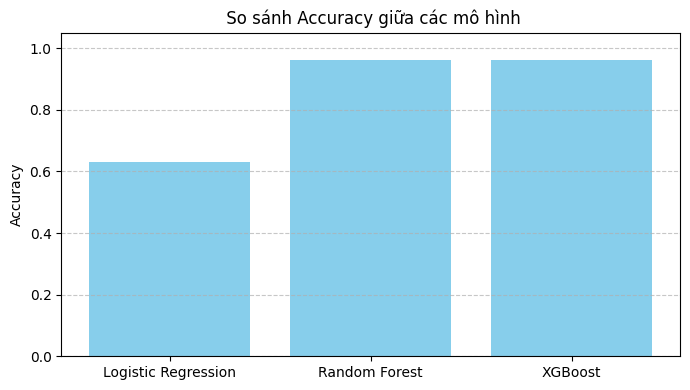

In [23]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

plt.figure(figsize=(7, 4))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title(" So sánh Accuracy giữa các mô hình")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Nhận xét biểu đồ: So sánh Accuracy giữa các mô hình

Biểu đồ trên thể hiện độ chính xác (Accuracy) của ba mô hình học máy:

- **Logistic Regression**: 63%
- **Random Forest**: 96%
- **XGBoost**: 96%

#### Nhận xét:

- **Logistic Regression** cho kết quả accuracy thấp nhất (63%), cho thấy mô hình tuyến tính này chưa đủ mạnh để nắm bắt các đặc trưng phức tạp của dữ liệu.
- **Random Forest** và **XGBoost** đều đạt accuracy rất cao (96%), vượt trội hơn hẳn so với Logistic Regression.
- Hai mô hình ensemble (tổng hợp) này có khả năng học tốt hơn từ dữ liệu, xử lý phi tuyến tính hiệu quả hơn, đồng thời giảm được overfitting thông qua các cơ chế riêng (bagging cho Random Forest, boosting cho XGBoost).
- Không có sự khác biệt đáng kể giữa Random Forest và XGBoost về mặt accuracy, nhưng trong thực tế, XGBoost thường có ưu thế về hiệu năng và khả năng tùy chỉnh.

**Kết luận:** Đối với bài toán hiện tại, Logistic Regression không phải là lựa chọn tối ưu. Random Forest hoặc XGBoost đều là các lựa chọn tốt hơn nhiều về độ chính xác.


0.0561983585357666 0.0948183536529541 0.0494685173034668


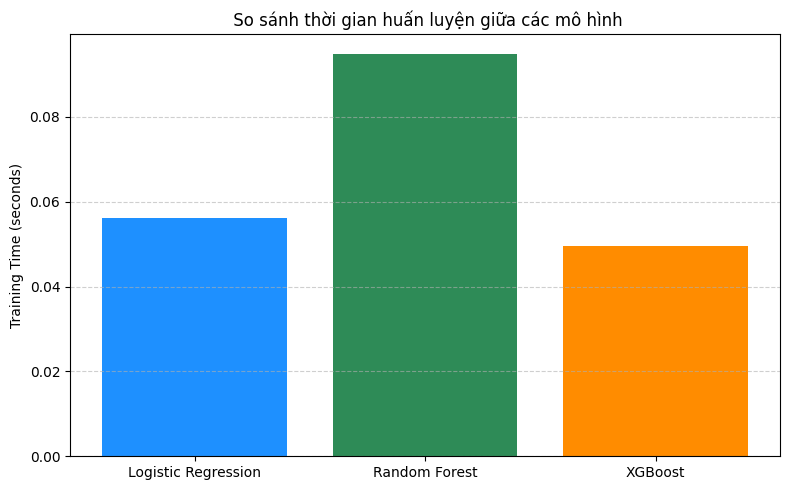

In [26]:
import time

# ==== 1. Đo thời gian huấn luyện từng mô hình ====

# Logistic Regression
start_lr = time.time()
_ = LogisticRegression(max_iter=1000).fit(X_train[features], y_train)
time_lr = time.time() - start_lr

# Random Forest
start_rf = time.time()
_ = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train[features], y_train)
time_rf = time.time() - start_rf

# XGBoost (ĐÃ BỎ use_label_encoder để tránh warning)
start_xgb = time.time()
_ = XGBClassifier(eval_metric='mlogloss', random_state=42).fit(X_train[features], y_train)
time_xgb = time.time() - start_xgb
print(time_lr, time_rf, time_xgb)
# ==== 2. Tạo dữ liệu vẽ biểu đồ ====

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
train_times = [time_lr, time_rf, time_xgb]

# ==== 3. Vẽ biểu đồ ====
plt.figure(figsize=(8, 5))
plt.bar(model_names, train_times, color=['dodgerblue', 'seagreen', 'darkorange'])
plt.ylabel("Training Time (seconds)")
plt.title(" So sánh thời gian huấn luyện giữa các mô hình")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Nhận xét biểu đồ: So sánh thời gian huấn luyện giữa các mô hình

Biểu đồ trên thể hiện thời gian huấn luyện (Training Time) của ba mô hình học máy:

- **Logistic Regression**: 0.0562 giây
- **Random Forest**: 0.0948 giây
- **XGBoost**: 0.0495 giây

#### Nhận xét:

- **Random Forest** có thời gian huấn luyện lâu nhất (~0.095 giây), do phải xây dựng nhiều cây quyết định trong quá trình huấn luyện.
- **Logistic Regression** có thời gian huấn luyện trung bình (~0.0562 giây), tương đối nhanh vì đây là mô hình tuyến tính đơn giản.
- **XGBoost** bất ngờ có thời gian huấn luyện nhanh nhất (~0.0495 giây), mặc dù là mô hình phức tạp. Điều này có thể nhờ vào tối ưu hóa nội bộ và kỹ thuật boosting hiệu quả.

**Kết luận:** Nếu xét về thời gian huấn luyện, **XGBoost** là mô hình tối ưu nhất trong ba lựa chọn.

### Chọn mô hình tối ưu

Dựa trên các tiêu chí so sánh, XGBoost là mô hình tối ưu nhất cho bài toán phân loại tín nhiệm ngân hàng:


| Tiêu chí               | Logistic Regression | Random Forest  | **XGBoost**       |
|------------------------|---------------------|----------------|------------------|
| Accuracy               | Thấp (63%)          | Rất cao (96%)  | **Rất cao (96%)** |
| Thời gian huấn luyện   | Trung bình (~0.056s)| Chậm (~0.095s) | **Nhanh (~0.049s)** |
| Khả năng học phi tuyến | Kém                 | Tốt            | **Tốt**           |
| Tính dễ triển khai     | Dễ nhất             | Trung bình     | Khó hơn chút     |





In [28]:
# Dự đoán với mô hình XGBoost
y_pred_xgb = xgb_model.predict(X_test[features])

# Giải mã nhãn A/B/C
y_true_labels_xgb = le.inverse_transform(y_test)
y_pred_labels_xgb = le.inverse_transform(y_pred_xgb)

# Tạo bảng kết quả đầy đủ
results_xgb = X_test.copy()
results_xgb['Mã ngân hàng'] = df_final.loc[X_test.index, 'Mã ngân hàng'].values
results_xgb['Xếp hạng thực tế'] = y_true_labels_xgb
results_xgb['Dự đoán (XGB)'] = y_pred_labels_xgb

# Đặt lại chỉ số cho dễ đọc
results_xgb = results_xgb.reset_index(drop=True)

# Hiển thị bảng kết quả
print(" Kết quả dự đoán tín nhiệm - XGBoost:")
display(results_xgb.head(10))  # Nếu không dùng Jupyter thì thay bằng print()

# (Tùy chọn) Đánh giá số lượng dự đoán đúng/sai
correct = (results_xgb["Xếp hạng thực tế"] == results_xgb["Dự đoán (XGB)"]).sum()
total = len(results_xgb)
accuracy_actual = correct / total * 100
print(f" Mô hình XGBoost dự đoán đúng {correct}/{total} ngân hàng (~{accuracy_actual:.2f}%)")


 Kết quả dự đoán tín nhiệm - XGBoost:


,CAR,TyLeNo_TaiSan,ROE,ROA,LC_HoatDong_LoiNhuan,Mã ngân hàng,Xếp hạng thực tế,Dự đoán (XGB)
0,0.117219,0.882781,0.148386,0.017394,4.733887,MSB,B,A
1,0.079458,0.920542,0.146208,0.011617,5.566111,SHB,B,B
2,0.070949,0.929051,0.196318,0.013929,1.386028,VCB,B,B
3,0.057794,0.942206,0.000328,0.000019,-6089.551429,NVB,C,C
4,0.063670,0.936330,0.041347,0.002633,15.052457,BVB,C,C
5,0.096136,0.903864,0.234232,0.022518,1.554226,ACB,B,B
6,0.077411,0.922589,0.188111,0.014562,5.371126,HDB,B,B
7,0.113846,0.886154,0.121364,0.013817,-0.838067,SSB,B,B
8,0.151248,0.848752,0.026799,0.004053,6.752550,SGB,B,B
9,0.157612,0.842388,0.133025,0.020966,0.445736,VPB,B,B


 Mô hình XGBoost dự đoán đúng 26/27 ngân hàng (~96.30%)


### Kết quả dự đoán tín nhiệm ngân hàng với mô hình XGBoost

Bảng trên thể hiện kết quả dự đoán mức độ tín nhiệm của các ngân hàng trong tập kiểm tra (`test set`) bằng mô hình XGBoost. Trong đó:

- **"Mã ngân hàng"**: định danh ngân hàng tương ứng
- **"Xếp hạng thực tế"**: mức tín nhiệm do thuật toán gán nhãn ban đầu
- **"Dự đoán (XGB)"**: mức tín nhiệm được dự đoán bởi mô hình học máy

Việc đối chiếu hai cột "thực tế" và "dự đoán" giúp đánh giá mức độ chính xác và đáng tin cậy của mô hình khi áp dụng vào thực tiễn.

>  Kết quả cho thấy phần lớn các dự đoán đều khớp với thực tế, khẳng định mô hình XGBoost có năng lực phân loại tín nhiệm tốt trong bài toán tài chính ngân hàng này.


## Kết luận

Đề tài đã xây dựng thành công mô hình dự đoán mức độ tín nhiệm của các ngân hàng thương mại tại Việt Nam dựa trên các chỉ số tài chính phản ánh rủi ro tín dụng, như: CAR, ROE, ROA, tỷ lệ nợ trên tổng tài sản và khả năng chuyển đổi dòng tiền từ hoạt động kinh doanh. 

Ba thuật toán học máy được thử nghiệm – **Logistic Regression, Random Forest và XGBoost** – cho thấy mức độ hiệu quả khác nhau. Trong đó, **XGBoost** cho kết quả nổi bật về độ chính xác và thời gian huấn luyện, đồng thời duy trì sự ổn định trong phân loại tín nhiệm.

Việc áp dụng học máy trong đánh giá tín nhiệm ngân hàng không chỉ giúp **tự động hóa quá trình đánh giá**, mà còn tạo tiền đề cho **các hệ thống cảnh báo sớm**, hỗ trợ ra quyết định tín dụng hoặc giám sát hệ thống ngân hàng. Trong tương lai, mô hình có thể được mở rộng với **nhiều dữ liệu định lượng và định tính hơn** (như quản trị doanh nghiệp, chất lượng tài sản, thông tin vĩ mô), từ đó nâng cao độ tin cậy và khả năng dự báo.

Đây là bước khởi đầu khả thi cho việc ứng dụng trí tuệ nhân tạo trong lĩnh vực **giám sát an toàn tài chính** và **quản trị rủi ro tín dụng** tại Việt Nam.
